# Data exploration of Cancer Breast Dataset

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from ydata_profiling import ProfileReport

from sklearn import preprocessing
#librairies pour la SOM
from minisom import MiniSom

#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Data loading

In [2]:
data = load_breast_cancer(as_frame=True)

In [3]:
plt.rcParams.update({'font.size': 20})

# 2 - Variables identification

In [4]:
list(data.target_names)

['malignant', 'benign']

In [5]:
list(data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [6]:
means = [colname for colname in list(data.feature_names) if 'mean' in colname]
errors = [colname for colname in list(data.feature_names) if 'error' in colname]
worsts = [colname for colname in list(data.feature_names) if 'worst' in colname]

In [7]:
input_data, output_data = data.data, data.target

In [8]:
output_data.value_counts()

1    357
0    212
Name: target, dtype: int64

In [9]:
input_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X = pd.concat([input_data,output_data],axis=1)

In [11]:
X.columns = list(input_data.columns)+['target']

In [12]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# 3 - Data profiling (Univariate and bi-variate statistics)

In [13]:
# profile = ProfileReport(X, title ="Profiling breast cancer dataset")
# profile.to_file(output_file = 'Global_Profile_breast_cancer_dataset.htm')

In [14]:
# split the data variables

In [15]:
DataGr = {'mean':input_data[means],'error':input_data[means],'worst':input_data[worsts],'global':input_data}

In [16]:
D = DataGr['global']

In [17]:
D.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Processing

In [18]:
def transforme(x):
    return np.nan_to_num(np.log(x+0.001))

In [19]:
D['radius error'].describe()

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius error, dtype: float64

In [20]:
errors

['radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error']

In [21]:
for colname in errors:
    D[colname] = D[colname].transform(transforme)

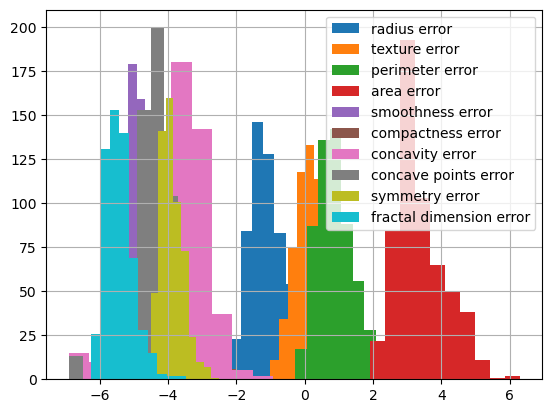

In [22]:
plt.rcParams.update({'font.size': 10})
for colname in errors:
    D[colname].hist(legend=True)
plt.show()

In [23]:
scaler = preprocessing.StandardScaler().fit(D)

In [24]:
X_scaled = scaler.transform(D)

## Self organizing map (SOM)

In [25]:
feature_names = list(input_data.columns)

In [26]:
len(feature_names)

30

In [27]:
size = 15
som = MiniSom(size, size, len(X_scaled[0]),
              neighborhood_function='gaussian', sigma=3.5,
              random_seed=1)

som.pca_weights_init(X_scaled)
som.train_random(X_scaled, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.625321712902419


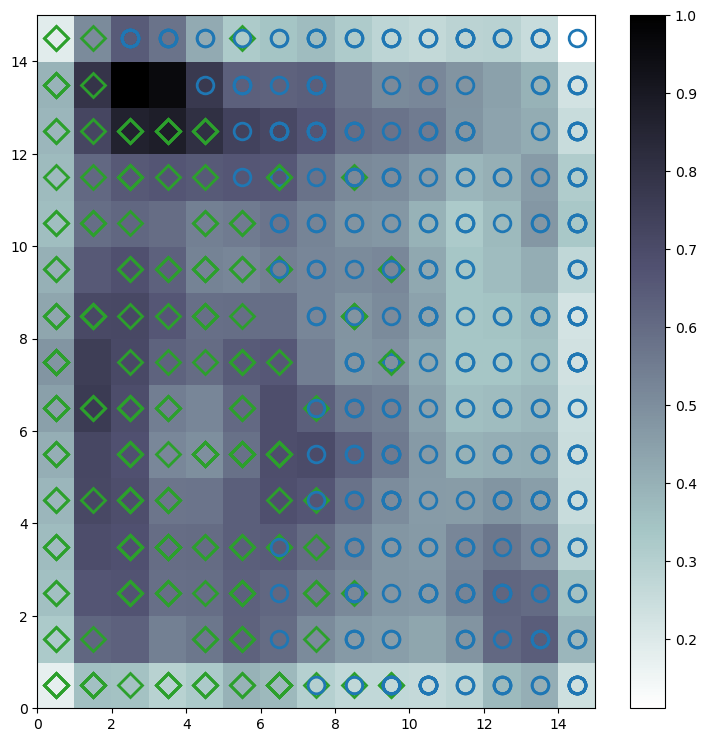

In [28]:
target = data.target

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

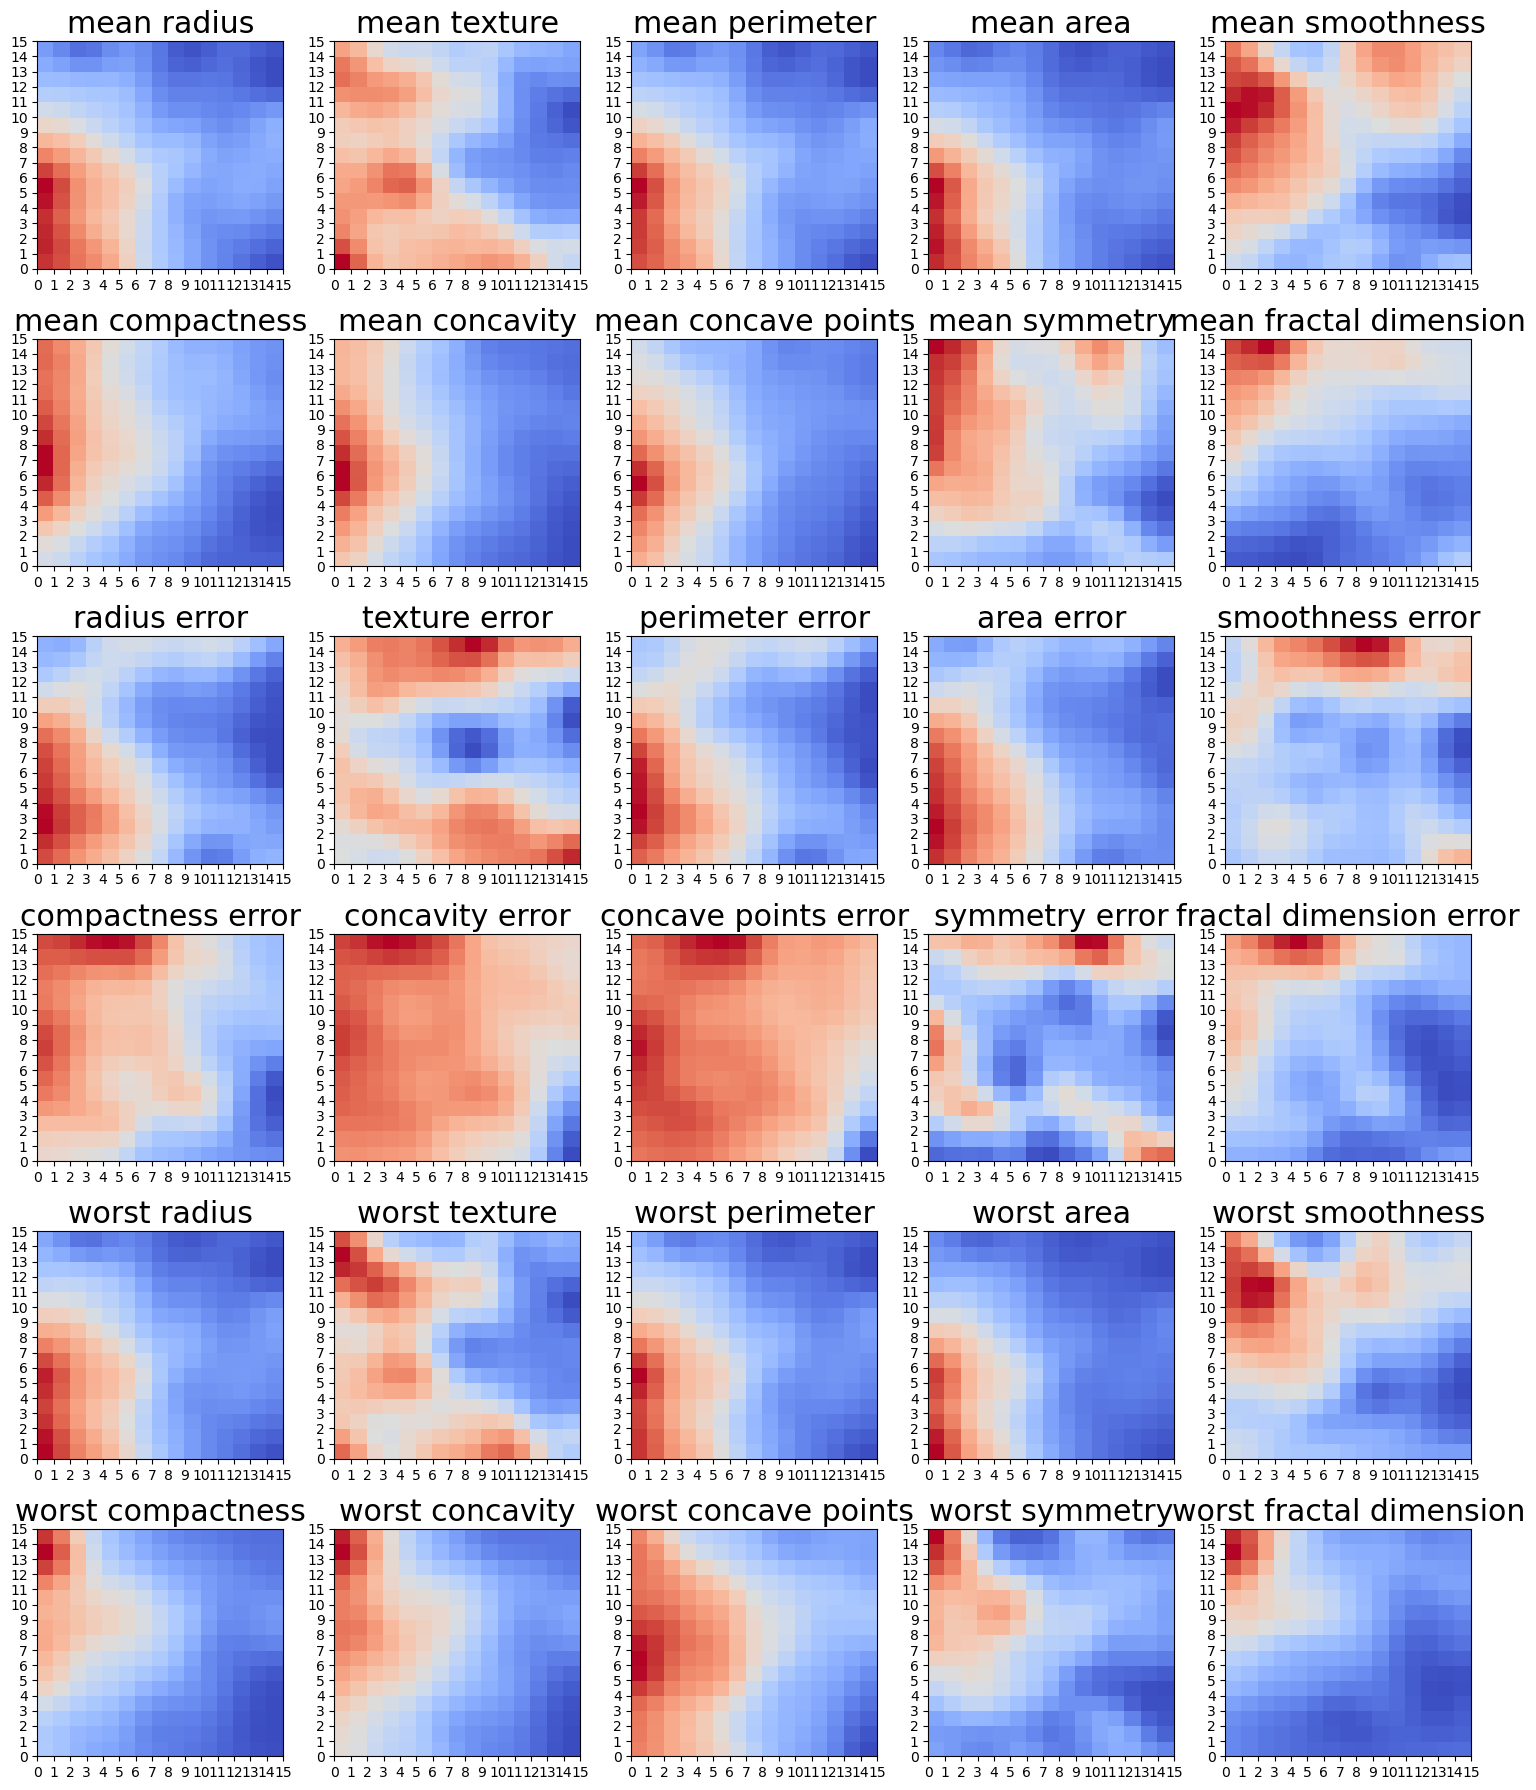

In [29]:
W = som.get_weights()
plt.figure(figsize=(15, 18))
for i, f in enumerate(feature_names):
    plt.subplot(6, 5, i+1)
    plt.rcParams.update({'font.size': 18})
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.rcParams.update({'font.size': 10})
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.savefig("brst_SOM_normalised",bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

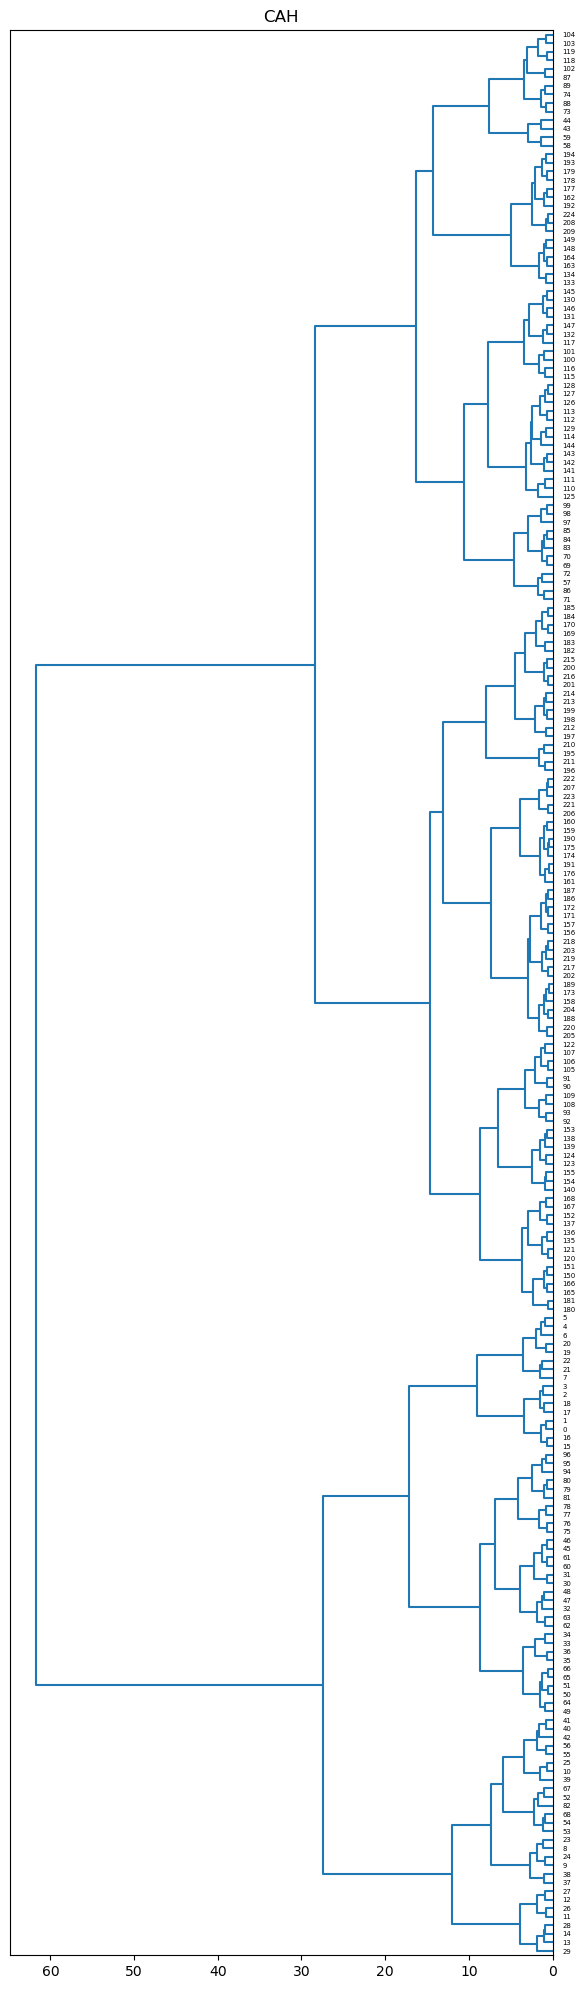

In [30]:
W_ = W.reshape((15*15,30))
#générer la matrice des liens
Z = linkage(W_,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(7,25))
plt.title("CAH")
dendrogram(Z,labels=range(15*15),orientation='left',color_threshold=0)
plt.show()

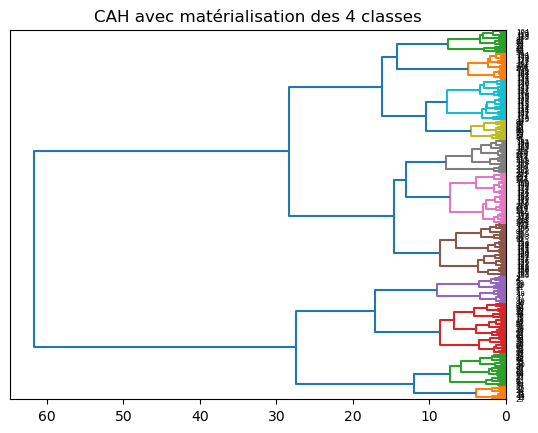

[ 4  4  4  4  4  4  4  4  2  2  2  1  1  1  1  4  4  4  4  4  4  4  4  2
  2  2  1  1  1  1  3  3  3  3  3  3  3  2  2  2  2  2  2 11 11  3  3  3
  3  3  3  3  2  2  2  2  2  8 11 11  3  3  3  3  3  3  3  2  2  8  8  8
  8 11 11  3  3  3  3  3  3  3  2  8  8  8  8 11 11 11  5  5  5  5  3  3
  3  8  8  8  9  9 11 11 11  5  5  5  5  5  9  9  9  9  9  9  9  9 11 11
  5  5  5  5  5  9  9  9  9  9  9  9  9 10 10  5  5  5  5  5  5  9  9  9
  9  9  9  9 10 10  5  5  5  5  5  5  6  6  6  6  6  6 10 10 10  5  5  5
  5  7  7  6  6  6  6  6  6 10 10 10  5  5  7  7  7  7  6  6  6  6  6  6
 10 10 10  7  7  7  7  7  7  7  6  6  6  6  6  6 10 10  7  7  7  7  7  7
  7  6  6  6  6  6  6  6 10]


In [31]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
T = 10
dendrogram(Z,labels=range(15*15),orientation='left',color_threshold=T)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=T,criterion='distance')
print(groupes_cah)

In [32]:
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(np.arange(15*15)[idg],groupes_cah[idg]))

      0
1    28
1    27
1    26
1    14
1    13
..  ...
11  103
11  104
11  118
11   87
11  102

[225 rows x 1 columns]


In [33]:
SOM_assignment = groupes_cah.reshape((15,15))

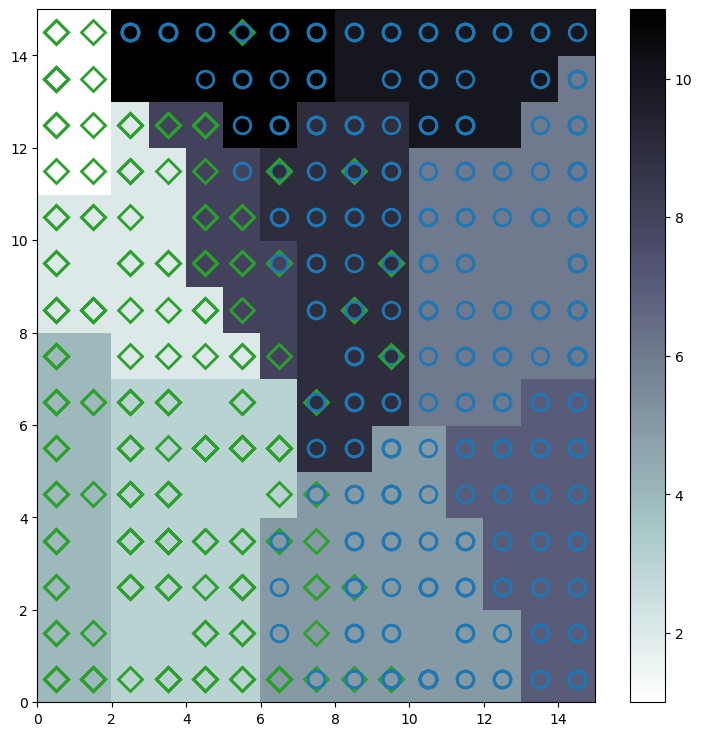

In [34]:
target = SOM_assignment

plt.figure(figsize=(9, 9))

plt.pcolor(target.T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

target = data.target

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

In [35]:
np.flip(SOM_assignment.T,axis=0)

array([[ 1,  1, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10],
       [ 1,  1, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10,  6],
       [ 1,  1,  2,  8,  8, 11, 11,  9,  9,  9, 10, 10, 10,  6,  6],
       [ 1,  1,  2,  2,  8,  8,  9,  9,  9,  9,  6,  6,  6,  6,  6],
       [ 2,  2,  2,  2,  8,  8,  9,  9,  9,  9,  6,  6,  6,  6,  6],
       [ 2,  2,  2,  2,  8,  8,  8,  9,  9,  9,  6,  6,  6,  6,  6],
       [ 2,  2,  2,  2,  2,  8,  8,  9,  9,  9,  6,  6,  6,  6,  6],
       [ 4,  4,  2,  2,  2,  2,  8,  9,  9,  9,  6,  6,  6,  6,  6],
       [ 4,  4,  3,  3,  3,  3,  3,  9,  9,  9,  6,  6,  6,  7,  7],
       [ 4,  4,  3,  3,  3,  3,  3,  9,  9,  5,  5,  7,  7,  7,  7],
       [ 4,  4,  3,  3,  3,  3,  3,  5,  5,  5,  5,  7,  7,  7,  7],
       [ 4,  4,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  7,  7,  7],
       [ 4,  4,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  7,  7,  7],
       [ 4,  4,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  7,  7],
       [ 4,  4,  3,  3,  3,  3,  5

In [36]:
classification =[]
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)
    classification.append(SOM_assignment[w[0],w[1]])

In [37]:
X_scaled[37,:]

array([-0.31164643, -0.20237305, -0.38550046, -0.37283086, -0.46473035,
       -1.2637033 , -0.79321448, -0.50786148, -1.25818311, -0.59080206,
       -1.15831384,  1.75047869, -1.35758105, -1.00271821, -1.09133982,
       -2.13247337, -0.5504354 ,  0.20591837,  0.94990145, -1.09956043,
       -0.61486734, -0.4669095 , -0.67915324, -0.58834373, -1.54997549,
       -1.32364799, -1.07396634, -0.98175349, -1.47825627, -1.2333243 ])

In [38]:
X.iloc[37,:]

mean radius                 13.030000
mean texture                18.420000
mean perimeter              82.610000
mean area                  523.800000
mean smoothness              0.089830
mean compactness             0.037660
mean concavity               0.025620
mean concave points          0.029230
mean symmetry                0.146700
mean fractal dimension       0.058630
radius error                 0.183900
texture error                2.342000
perimeter error              1.170000
area error                  14.160000
smoothness error             0.004352
compactness error            0.004899
concavity error              0.013430
concave points error         0.011640
symmetry error               0.026710
fractal dimension error      0.001777
worst radius                13.300000
worst texture               22.810000
worst perimeter             84.460000
worst area                 545.900000
worst smoothness             0.097010
worst compactness            0.046190
worst concav

In [39]:
np.where(np.array(classification)==7)

(array([ 37,  50,  58,  92, 101, 125, 140, 144, 159, 165, 174, 175, 178,
        179, 185, 189, 192, 224, 241, 251, 270, 276, 278, 285, 287, 295,
        296, 306, 307, 308, 309, 311, 314, 315, 316, 319, 326, 327, 332,
        333, 350, 357, 360, 387, 391, 395, 404, 425, 428, 429, 439, 442,
        473, 481, 491, 493, 511, 522, 538, 550, 557, 561, 568]),)

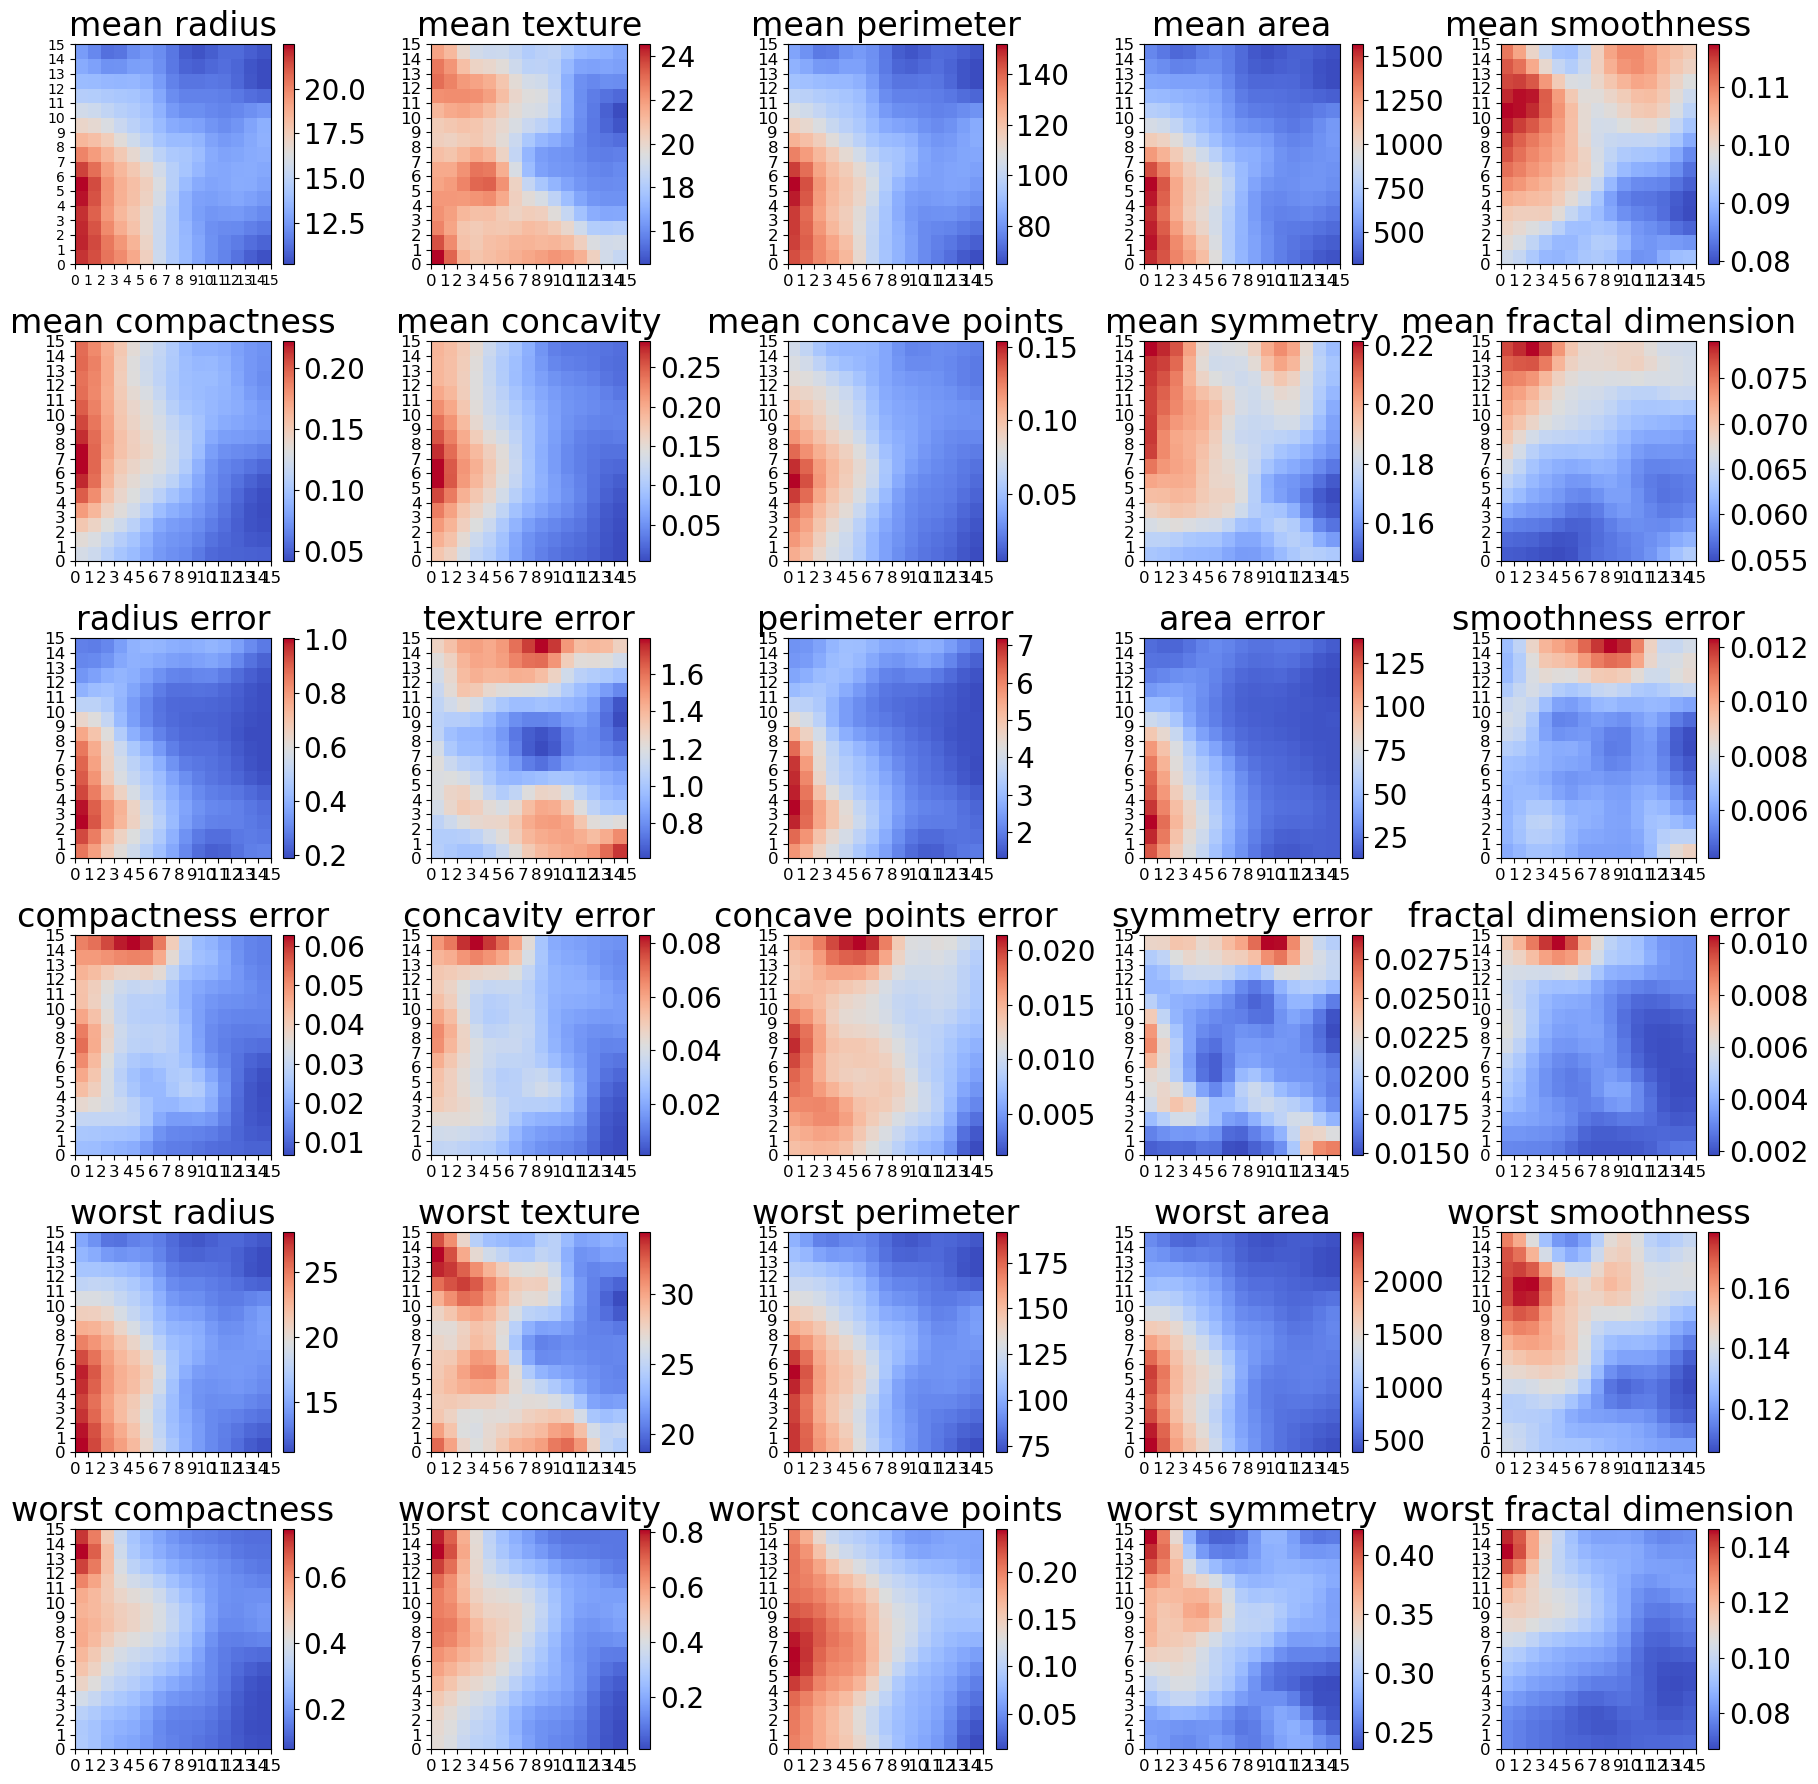

In [40]:
W__ = scaler.inverse_transform(W_)
for i in range(10,20):
    W__[:,i] = np.exp(W__[:,i])-0.001
W__ = W__.reshape((15,15,30))
plt.figure(figsize=(18, 18))
for i, f in enumerate(feature_names):
    plt.subplot(6, 5, i+1)
    plt.rcParams.update({'font.size': 20})
    plt.title(f)
    plt.pcolor(W__[:,:,i].T, cmap='coolwarm')
    plt.colorbar()
    plt.rcParams.update({'font.size': 12})
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.savefig("brst_SOM",bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

In [41]:
# Reinforcement Attention

In [42]:
import sys
sys.path.append('..')
import tensorflow as tf
from src.ReinforcementAttention.ReinforcementAttention import MultiHeadReinforcementAttention, ReinforcementAttention
from src.ReinforcementAttention.SelfReinforcementAttention import MultiHeadSelfReinforcementAttention, \
    SelfReinforcementAttention

2023-09-25 16:22:17.497883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
def model_sra(input_dim,keys_hidden) -> tf.keras.Model:
    tf.keras.utils.set_random_seed(seed = 42)
    input_1 = tf.keras.layers.Input(shape=(input_dim,))
    x = SelfReinforcementAttention(input_dim, (input_dim, 8), False,)(input_1)
    x = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)
    model = tf.keras.Model(inputs=input_1, outputs=x)  # SRA
    print('model SRA created!')
    return model

In [44]:
model = model_sra(30,(16,))

for input KerasTensor(type_spec=TensorSpec(shape=(None, 30), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'") the out shape is (None, 30, 8) and this is a
for input KerasTensor(type_spec=TensorSpec(shape=(None, 30), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'") the out shape is (None, 30, 8) and this is a
This is the attention vector shape (None, 30)
model SRA created!


2023-09-25 16:22:18.367423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 16:22:18.367920: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [46]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 self_reinforcement_attentio  (None, 30)               2968      
 n (SelfReinforcementAttenti                                     
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 2,999
Trainable params: 2,999
Non-trainable params: 0
_________________________________________________________________


In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
encoder.fit(data.target)
y_train = encoder.transform(data.target)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.3, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [48]:
model.fit(X_train, y_train, epochs=1000, batch_size=len(X_train),validation_split=0.2)

Epoch 1/1000
1/1 [==============================] - 1s 917ms/step - loss: 0.8731 - accuracy: 0.1730 - val_loss: 0.9007 - val_accuracy: 0.2250
Epoch 2/1000
1/1 [==============================] - 0s 100ms/step - loss: 0.8680 - accuracy: 0.1761 - val_loss: 0.8950 - val_accuracy: 0.2375
Epoch 3/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.8629 - accuracy: 0.1761 - val_loss: 0.8894 - val_accuracy: 0.2375
Epoch 4/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.8579 - accuracy: 0.1824 - val_loss: 0.8838 - val_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 109ms/step - loss: 0.8530 - accuracy: 0.1855 - val_loss: 0.8783 - val_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.8480 - accuracy: 0.1918 - val_loss: 0.8728 - val_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 98ms/step - loss: 0.8431 - accuracy: 0.2013 - val_loss: 0.8674 - val_accuracy: 0.2500
Epoch 8/10

Epoch 59/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.5650 - accuracy: 0.8239 - val_loss: 0.5510 - val_accuracy: 0.7750
Epoch 60/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.5593 - accuracy: 0.8270 - val_loss: 0.5447 - val_accuracy: 0.7750
Epoch 61/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.5536 - accuracy: 0.8333 - val_loss: 0.5384 - val_accuracy: 0.7875
Epoch 62/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.5479 - accuracy: 0.8302 - val_loss: 0.5322 - val_accuracy: 0.8000
Epoch 63/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.5423 - accuracy: 0.8302 - val_loss: 0.5260 - val_accuracy: 0.8000
Epoch 64/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.5367 - accuracy: 0.8302 - val_loss: 0.5199 - val_accuracy: 0.8125
Epoch 65/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.5312 - accuracy: 0.8396 - val_loss: 0.5139 - val_accuracy: 0.8125
Epoch 

1/1 [==============================] - 0s 53ms/step - loss: 0.3198 - accuracy: 0.9119 - val_loss: 0.3068 - val_accuracy: 0.9250
Epoch 117/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.3171 - accuracy: 0.9119 - val_loss: 0.3044 - val_accuracy: 0.9250
Epoch 118/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.3145 - accuracy: 0.9119 - val_loss: 0.3021 - val_accuracy: 0.9250
Epoch 119/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.3120 - accuracy: 0.9151 - val_loss: 0.2998 - val_accuracy: 0.9250
Epoch 120/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.3095 - accuracy: 0.9182 - val_loss: 0.2975 - val_accuracy: 0.9250
Epoch 121/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.3070 - accuracy: 0.9214 - val_loss: 0.2953 - val_accuracy: 0.9250
Epoch 122/1000
1/1 [==============================] - 0s 96ms/step - loss: 0.3046 - accuracy: 0.9214 - val_loss: 0.2932 - val_accuracy: 0.9250
Epoch 123/1000

1/1 [==============================] - 0s 69ms/step - loss: 0.2240 - accuracy: 0.9465 - val_loss: 0.2231 - val_accuracy: 0.9250
Epoch 174/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.2229 - accuracy: 0.9465 - val_loss: 0.2223 - val_accuracy: 0.9250
Epoch 175/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.2219 - accuracy: 0.9465 - val_loss: 0.2214 - val_accuracy: 0.9250
Epoch 176/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.2209 - accuracy: 0.9465 - val_loss: 0.2205 - val_accuracy: 0.9250
Epoch 177/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.2199 - accuracy: 0.9465 - val_loss: 0.2197 - val_accuracy: 0.9250
Epoch 178/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.2189 - accuracy: 0.9465 - val_loss: 0.2188 - val_accuracy: 0.9250
Epoch 179/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.2179 - accuracy: 0.9465 - val_loss: 0.2180 - val_accuracy: 0.9250
Epoch 180/1000

1/1 [==============================] - 0s 89ms/step - loss: 0.1782 - accuracy: 0.9560 - val_loss: 0.1859 - val_accuracy: 0.9375
Epoch 231/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.1776 - accuracy: 0.9560 - val_loss: 0.1854 - val_accuracy: 0.9375
Epoch 232/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.1770 - accuracy: 0.9560 - val_loss: 0.1849 - val_accuracy: 0.9375
Epoch 233/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1764 - accuracy: 0.9560 - val_loss: 0.1844 - val_accuracy: 0.9375
Epoch 234/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1758 - accuracy: 0.9560 - val_loss: 0.1839 - val_accuracy: 0.9375
Epoch 235/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.1752 - accuracy: 0.9560 - val_loss: 0.1834 - val_accuracy: 0.9375
Epoch 236/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1746 - accuracy: 0.9560 - val_loss: 0.1830 - val_accuracy: 0.9375
Epoch 237/1000

1/1 [==============================] - 0s 75ms/step - loss: 0.1493 - accuracy: 0.9654 - val_loss: 0.1633 - val_accuracy: 0.9375
Epoch 288/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.1489 - accuracy: 0.9654 - val_loss: 0.1630 - val_accuracy: 0.9375
Epoch 289/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1485 - accuracy: 0.9654 - val_loss: 0.1627 - val_accuracy: 0.9375
Epoch 290/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.1481 - accuracy: 0.9654 - val_loss: 0.1624 - val_accuracy: 0.9500
Epoch 291/1000
1/1 [==============================] - 0s 91ms/step - loss: 0.1477 - accuracy: 0.9654 - val_loss: 0.1621 - val_accuracy: 0.9500
Epoch 292/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.1473 - accuracy: 0.9654 - val_loss: 0.1618 - val_accuracy: 0.9500
Epoch 293/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.1469 - accuracy: 0.9654 - val_loss: 0.1615 - val_accuracy: 0.9500
Epoch 294/1000

1/1 [==============================] - 0s 40ms/step - loss: 0.1300 - accuracy: 0.9686 - val_loss: 0.1488 - val_accuracy: 0.9500
Epoch 345/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.1297 - accuracy: 0.9686 - val_loss: 0.1486 - val_accuracy: 0.9500
Epoch 346/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.1294 - accuracy: 0.9686 - val_loss: 0.1484 - val_accuracy: 0.9500
Epoch 347/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.1292 - accuracy: 0.9686 - val_loss: 0.1482 - val_accuracy: 0.9500
Epoch 348/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.1289 - accuracy: 0.9686 - val_loss: 0.1480 - val_accuracy: 0.9500
Epoch 349/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.1286 - accuracy: 0.9686 - val_loss: 0.1478 - val_accuracy: 0.9500
Epoch 350/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.1283 - accuracy: 0.9686 - val_loss: 0.1476 - val_accuracy: 0.9500
Epoch 351/1000

1/1 [==============================] - 0s 60ms/step - loss: 0.1157 - accuracy: 0.9686 - val_loss: 0.1389 - val_accuracy: 0.9500
Epoch 402/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.1155 - accuracy: 0.9686 - val_loss: 0.1388 - val_accuracy: 0.9500
Epoch 403/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.1152 - accuracy: 0.9686 - val_loss: 0.1386 - val_accuracy: 0.9500
Epoch 404/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1150 - accuracy: 0.9686 - val_loss: 0.1385 - val_accuracy: 0.9500
Epoch 405/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.1148 - accuracy: 0.9686 - val_loss: 0.1383 - val_accuracy: 0.9500
Epoch 406/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.1145 - accuracy: 0.9686 - val_loss: 0.1382 - val_accuracy: 0.9500
Epoch 407/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.1143 - accuracy: 0.9686 - val_loss: 0.1381 - val_accuracy: 0.9500
Epoch 408/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.1033 - accuracy: 0.9717 - val_loss: 0.1313 - val_accuracy: 0.9625
Epoch 459/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.1031 - accuracy: 0.9717 - val_loss: 0.1312 - val_accuracy: 0.9625
Epoch 460/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.1029 - accuracy: 0.9717 - val_loss: 0.1311 - val_accuracy: 0.9625
Epoch 461/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.1026 - accuracy: 0.9717 - val_loss: 0.1310 - val_accuracy: 0.9625
Epoch 462/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.1024 - accuracy: 0.9717 - val_loss: 0.1309 - val_accuracy: 0.9625
Epoch 463/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.1022 - accuracy: 0.9717 - val_loss: 0.1307 - val_accuracy: 0.9625
Epoch 464/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.1020 - accuracy: 0.9717 - val_loss: 0.1306 - val_accuracy: 0.9625
Epoch 465/1000

1/1 [==============================] - 0s 38ms/step - loss: 0.0920 - accuracy: 0.9748 - val_loss: 0.1249 - val_accuracy: 0.9500
Epoch 516/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.0918 - accuracy: 0.9748 - val_loss: 0.1248 - val_accuracy: 0.9500
Epoch 517/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0916 - accuracy: 0.9748 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 518/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0915 - accuracy: 0.9748 - val_loss: 0.1246 - val_accuracy: 0.9500
Epoch 519/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0913 - accuracy: 0.9748 - val_loss: 0.1245 - val_accuracy: 0.9500
Epoch 520/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.0911 - accuracy: 0.9748 - val_loss: 0.1244 - val_accuracy: 0.9500
Epoch 521/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0909 - accuracy: 0.9748 - val_loss: 0.1242 - val_accuracy: 0.9500
Epoch 522/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.0814 - accuracy: 0.9811 - val_loss: 0.1194 - val_accuracy: 0.9750
Epoch 573/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0812 - accuracy: 0.9811 - val_loss: 0.1193 - val_accuracy: 0.9750
Epoch 574/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0811 - accuracy: 0.9811 - val_loss: 0.1192 - val_accuracy: 0.9750
Epoch 575/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0809 - accuracy: 0.9811 - val_loss: 0.1191 - val_accuracy: 0.9750
Epoch 576/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.0807 - accuracy: 0.9811 - val_loss: 0.1190 - val_accuracy: 0.9750
Epoch 577/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.0805 - accuracy: 0.9811 - val_loss: 0.1189 - val_accuracy: 0.9750
Epoch 578/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.0803 - accuracy: 0.9811 - val_loss: 0.1189 - val_accuracy: 0.9750
Epoch 579/1000

1/1 [==============================] - 0s 101ms/step - loss: 0.0719 - accuracy: 0.9811 - val_loss: 0.1145 - val_accuracy: 0.9625
Epoch 630/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.0717 - accuracy: 0.9811 - val_loss: 0.1144 - val_accuracy: 0.9625
Epoch 631/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.0716 - accuracy: 0.9811 - val_loss: 0.1143 - val_accuracy: 0.9625
Epoch 632/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0714 - accuracy: 0.9811 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 633/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0713 - accuracy: 0.9811 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 634/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.0711 - accuracy: 0.9811 - val_loss: 0.1141 - val_accuracy: 0.9625
Epoch 635/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.0710 - accuracy: 0.9811 - val_loss: 0.1140 - val_accuracy: 0.9625
Epoch 636/100

1/1 [==============================] - 0s 76ms/step - loss: 0.0640 - accuracy: 0.9906 - val_loss: 0.1107 - val_accuracy: 0.9500
Epoch 687/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0638 - accuracy: 0.9906 - val_loss: 0.1106 - val_accuracy: 0.9500
Epoch 688/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.0637 - accuracy: 0.9906 - val_loss: 0.1106 - val_accuracy: 0.9500
Epoch 689/1000
1/1 [==============================] - 0s 106ms/step - loss: 0.0636 - accuracy: 0.9906 - val_loss: 0.1105 - val_accuracy: 0.9500
Epoch 690/1000
1/1 [==============================] - 0s 86ms/step - loss: 0.0634 - accuracy: 0.9906 - val_loss: 0.1104 - val_accuracy: 0.9500
Epoch 691/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.0633 - accuracy: 0.9906 - val_loss: 0.1104 - val_accuracy: 0.9500
Epoch 692/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0632 - accuracy: 0.9906 - val_loss: 0.1103 - val_accuracy: 0.9500
Epoch 693/100

1/1 [==============================] - 0s 37ms/step - loss: 0.0571 - accuracy: 0.9937 - val_loss: 0.1081 - val_accuracy: 0.9500
Epoch 744/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0570 - accuracy: 0.9937 - val_loss: 0.1080 - val_accuracy: 0.9500
Epoch 745/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0569 - accuracy: 0.9937 - val_loss: 0.1080 - val_accuracy: 0.9500
Epoch 746/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0568 - accuracy: 0.9937 - val_loss: 0.1080 - val_accuracy: 0.9500
Epoch 747/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0567 - accuracy: 0.9937 - val_loss: 0.1079 - val_accuracy: 0.9500
Epoch 748/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0566 - accuracy: 0.9937 - val_loss: 0.1079 - val_accuracy: 0.9500
Epoch 749/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0564 - accuracy: 0.9937 - val_loss: 0.1079 - val_accuracy: 0.9500
Epoch 750/1000

1/1 [==============================] - 0s 44ms/step - loss: 0.0513 - accuracy: 0.9937 - val_loss: 0.1060 - val_accuracy: 0.9500
Epoch 801/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0512 - accuracy: 0.9937 - val_loss: 0.1060 - val_accuracy: 0.9500
Epoch 802/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0511 - accuracy: 0.9937 - val_loss: 0.1060 - val_accuracy: 0.9500
Epoch 803/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0510 - accuracy: 0.9937 - val_loss: 0.1059 - val_accuracy: 0.9500
Epoch 804/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0509 - accuracy: 0.9937 - val_loss: 0.1059 - val_accuracy: 0.9500
Epoch 805/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0508 - accuracy: 0.9937 - val_loss: 0.1059 - val_accuracy: 0.9500
Epoch 806/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.0507 - accuracy: 0.9937 - val_loss: 0.1058 - val_accuracy: 0.9500
Epoch 807/1000

1/1 [==============================] - 0s 58ms/step - loss: 0.0463 - accuracy: 0.9937 - val_loss: 0.1044 - val_accuracy: 0.9500
Epoch 858/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.0462 - accuracy: 0.9937 - val_loss: 0.1044 - val_accuracy: 0.9500
Epoch 859/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0461 - accuracy: 0.9937 - val_loss: 0.1043 - val_accuracy: 0.9500
Epoch 860/1000
1/1 [==============================] - 0s 90ms/step - loss: 0.0460 - accuracy: 0.9937 - val_loss: 0.1043 - val_accuracy: 0.9500
Epoch 861/1000
1/1 [==============================] - 0s 79ms/step - loss: 0.0460 - accuracy: 0.9937 - val_loss: 0.1043 - val_accuracy: 0.9500
Epoch 862/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0459 - accuracy: 0.9937 - val_loss: 0.1042 - val_accuracy: 0.9500
Epoch 863/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.0458 - accuracy: 0.9937 - val_loss: 0.1042 - val_accuracy: 0.9500
Epoch 864/1000

1/1 [==============================] - 0s 64ms/step - loss: 0.0419 - accuracy: 0.9937 - val_loss: 0.1032 - val_accuracy: 0.9375
Epoch 915/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.0418 - accuracy: 0.9937 - val_loss: 0.1032 - val_accuracy: 0.9375
Epoch 916/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0417 - accuracy: 0.9937 - val_loss: 0.1032 - val_accuracy: 0.9375
Epoch 917/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0417 - accuracy: 0.9937 - val_loss: 0.1032 - val_accuracy: 0.9375
Epoch 918/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0416 - accuracy: 0.9937 - val_loss: 0.1031 - val_accuracy: 0.9375
Epoch 919/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.0415 - accuracy: 0.9937 - val_loss: 0.1031 - val_accuracy: 0.9375
Epoch 920/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.0414 - accuracy: 0.9937 - val_loss: 0.1031 - val_accuracy: 0.9375
Epoch 921/1000

1/1 [==============================] - 0s 106ms/step - loss: 0.0379 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 972/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0379 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 973/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.0378 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 974/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0377 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 975/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.0377 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 976/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0376 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 977/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0375 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9375
Epoch 978/100

In [49]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9825


[0.07786838710308075, 0.9824561476707458]

## Visualize attention weights

In [50]:
layer_name = model.layers[1].name

# Retrieve the layer object using the layer name
layer_model = model.get_layer(layer_name)
# Print the name of the layer
print(layer_name)

self_reinforcement_attention


In [51]:
X_train

array([[-0.10999635, -0.32105347, -0.15854246, ..., -0.82857392,
        -0.89100191, -0.76506065],
       [-0.2150816 , -0.67476767, -0.24174666, ..., -0.37801891,
        -1.37957166, -0.42480753],
       [ 0.15981713, -1.23559085,  0.25747857, ..., -0.05795583,
        -0.11932056,  0.45076239],
       ...,
       [ 0.04621146, -0.57470379, -0.06874782, ..., -1.23756033,
        -0.71628161, -1.26047806],
       [-0.04183295,  0.07687501, -0.03497186, ...,  1.03683652,
         0.45013821,  1.19444266],
       [-0.5530585 ,  0.28631105, -0.60751564, ..., -0.61357437,
        -0.33448538, -0.84042616]])

In [52]:
attn_wts = []
label = []
reinf_vectors = []
for i, j,c in zip(X_train,layer_model.model_([X_train,X_train]).numpy(),y_train):
#     print(i,j/i,c)
    attn_wts.append(j/i)
    label.append(c)
    reinf_vectors.append(j)

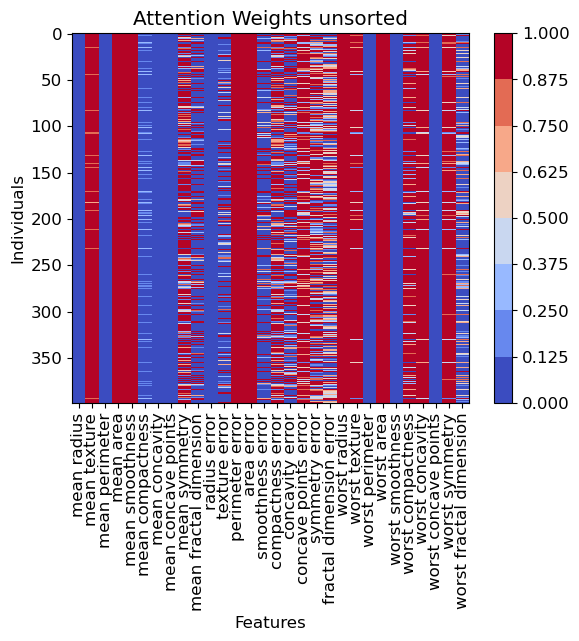

In [53]:
import matplotlib.colors as colors

attention_weights = np.array(attn_wts)
num_rows, num_cols = attention_weights.shape
weights = attention_weights.reshape(num_rows, num_cols)

# plt.figure(figsize=(10,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto')

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot = weights
# With out-of-bounds colors:
bounds = np.linspace(0, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = plt.pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='coolwarm')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')

plt.title(f'Attention Weights unsorted')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0,weights.shape[1],weights.shape[1])
x_tick_labels = list(feature_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
# plt.savefig(fname = f"./{dataset_name}/Attention weights.png",dpi = 300)
plt.show()

In [54]:
combined_list = []
for i in range(len(weights)):
    combined_list.append([weights[i],label[i]])
print(combined_list[0:1])

[[array([4.84459452e-05, 1.46055691e+00, 3.04743553e-05, 1.46032739e+00,
       1.46044692e+00, 6.22087937e-03, 3.41580627e-05, 5.06592606e-05,
       1.35596922e+00, 1.04724135e-04, 5.60275152e-06, 2.14182219e-02,
       1.46055809e+00, 1.46048474e+00, 7.45292517e-07, 1.23568397e+00,
       8.62934700e-02, 1.41703781e+00, 2.50082269e-02, 1.18568040e-04,
       1.46044269e+00, 1.46058990e+00, 1.00974692e-05, 1.46057799e+00,
       8.86465878e-06, 1.44922290e+00, 1.45996042e+00, 1.19170695e-04,
       1.45862394e+00, 5.29837079e-03]), 1]]


In [55]:
sorted_data = sorted( combined_list, key=lambda x: x[1].tolist(), reverse=True)
print(sorted_data[0])

[array([4.84459452e-05, 1.46055691e+00, 3.04743553e-05, 1.46032739e+00,
       1.46044692e+00, 6.22087937e-03, 3.41580627e-05, 5.06592606e-05,
       1.35596922e+00, 1.04724135e-04, 5.60275152e-06, 2.14182219e-02,
       1.46055809e+00, 1.46048474e+00, 7.45292517e-07, 1.23568397e+00,
       8.62934700e-02, 1.41703781e+00, 2.50082269e-02, 1.18568040e-04,
       1.46044269e+00, 1.46058990e+00, 1.00974692e-05, 1.46057799e+00,
       8.86465878e-06, 1.44922290e+00, 1.45996042e+00, 1.19170695e-04,
       1.45862394e+00, 5.29837079e-03]), 1]


In [56]:
count_label = np.unique(y_train,axis = 0)
target_array_1 = count_label[0]
target_array_2 = count_label[1]



count_1 = 0
count_2 = 0
indices_1 = []
indices_2 = []
indices_3 = []

for i, item in enumerate(sorted_data):
    if np.array_equal(item[1], target_array_1):
        count_1 += 1
        indices_1.append(i)
    elif np.array_equal(item[1], target_array_2):
        count_2 += 1
        indices_2.append(i)
    elif np.array_equal(item[1], target_array_3):
        indices_3.append(i)

print(f"Count of {target_array_1}: {count_1}")
print(f"Indices of {target_array_1}: {indices_1}")
print(f"Count of {target_array_2}: {count_2}")
print(f"Indices of {target_array_2}: {indices_2}")

Count of 0: 149
Indices of 0: [249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]
Count of 1: 249
Indices of 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,

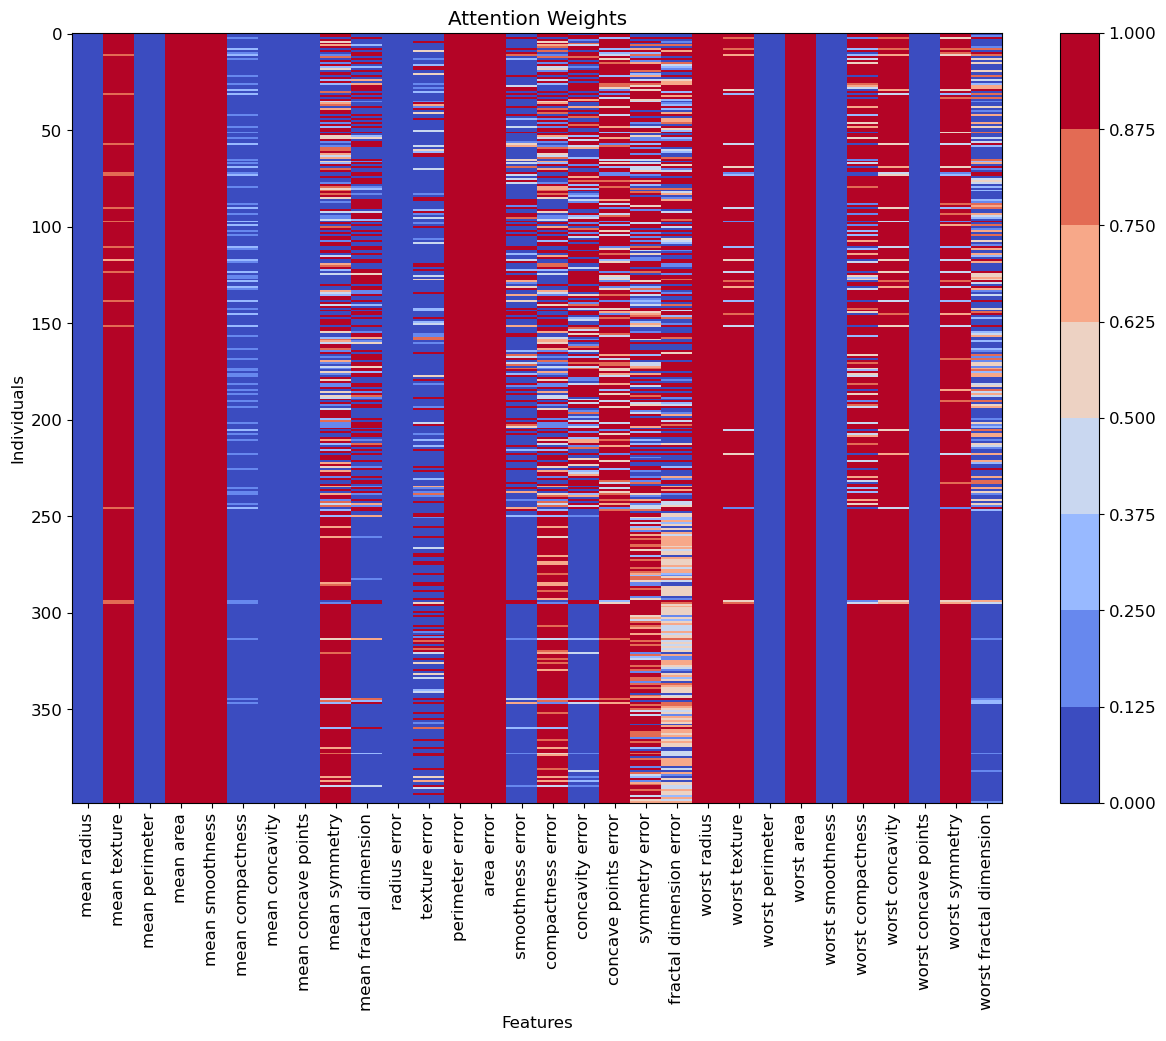

In [57]:
from matplotlib.cm import ScalarMappable

sorted_attention_wts = [x[0] for x in sorted( combined_list, key=lambda x: x[1].tolist(), reverse=True)]
attention_weights_sorted = np.array(sorted_attention_wts)
num_rows, num_cols = attention_weights_sorted.shape
weights = attention_weights_sorted.reshape(num_rows, num_cols)


plt.figure(figsize=(15,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0,weights.shape[1],weights.shape[0],0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot= weights
# With out-of-bounds colors:
bounds = np.linspace(0, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = plt.pcolormesh(X_plot,Y_plot,Z_plot, norm=norm, cmap='coolwarm')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')

plt.title(f'Attention Weights')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0,weights.shape[1],weights.shape[1])
x_tick_labels = list(feature_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
plt.savefig(fname = f"Attention weights_sorted.png", bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

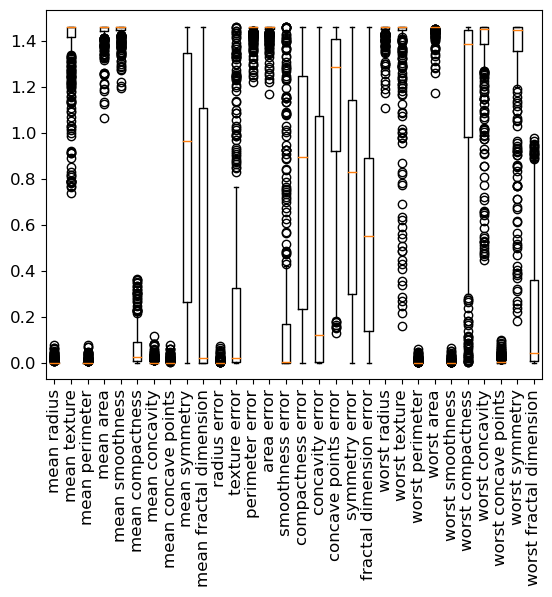

In [58]:
plt.boxplot(weights)
x_ticks = np.linspace(1,weights.shape[1],weights.shape[1])
x_tick_labels = list(feature_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
plt.show()

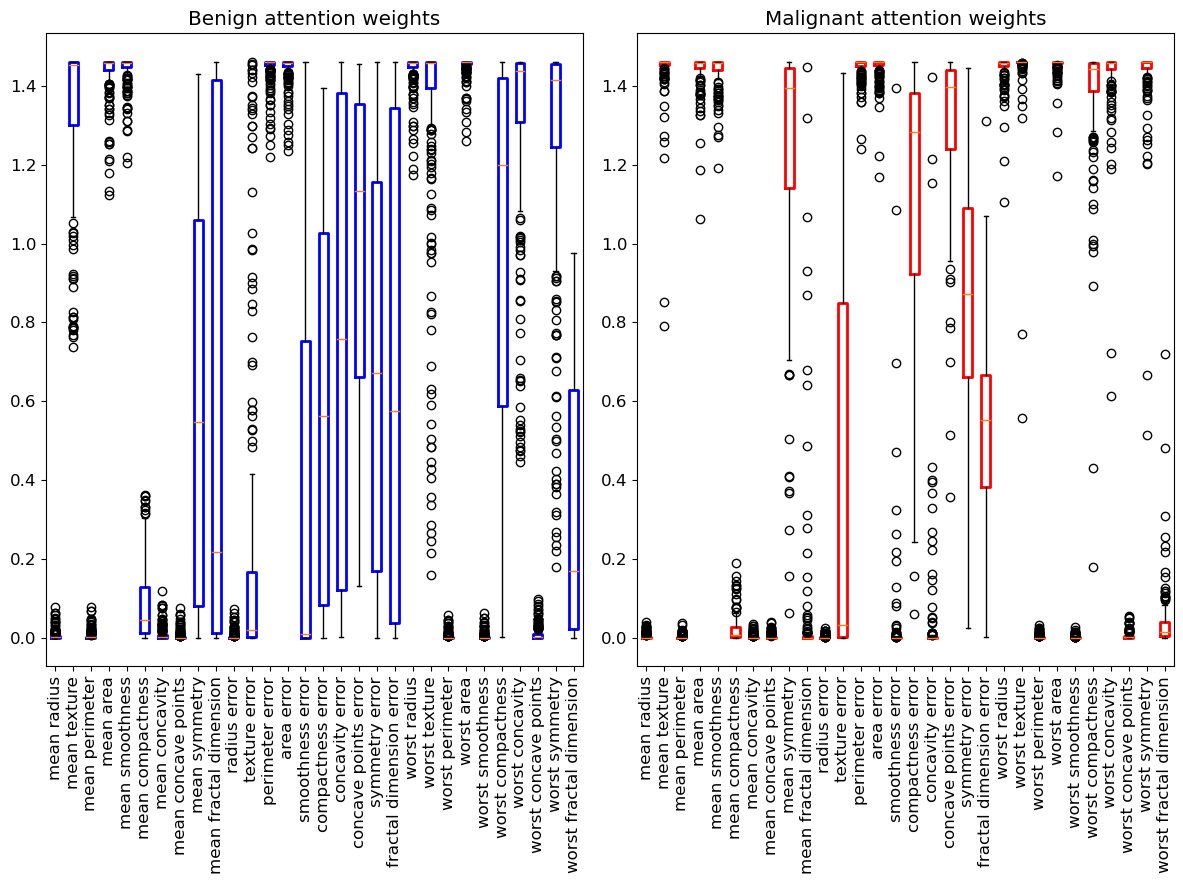

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Split the data into two sets
weights1 = attention_weights_sorted[:248]
weights2 = attention_weights_sorted[249:]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 9))

# Plot the first boxplot on the first subplot
boxprops = dict(color='blue', linewidth=2)
axes[0].boxplot(weights1,boxprops=boxprops)
x_ticks = np.linspace(1, weights1.shape[1], weights1.shape[1])
x_tick_labels = list(feature_names)
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(x_tick_labels, rotation=90)
axes[0].set_title("Benign attention weights")

# Plot the second boxplot on the second subplot
boxprops = dict(color='red', linewidth=2)
axes[1].boxplot(weights2,boxprops=boxprops)
x_ticks = np.linspace(1, weights2.shape[1], weights2.shape[1])
x_tick_labels = list(feature_names)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(x_tick_labels, rotation=90)
axes[1].set_title("Malignant attention weights")

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [60]:
y_train = np.eye(2)[y_train]

In [61]:
y_train.shape

(398, 2)

In [62]:
y_train = y_train*5

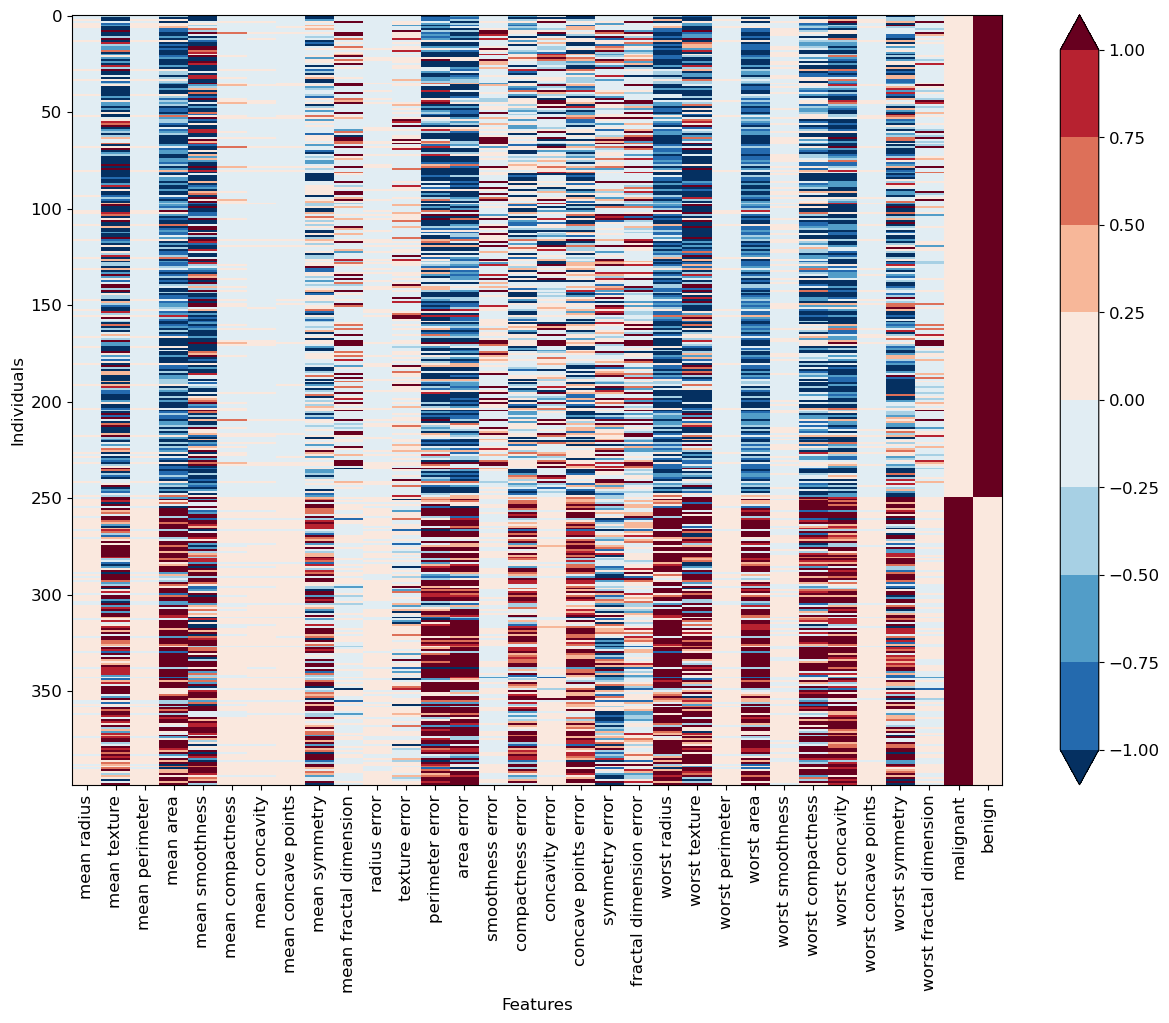

In [63]:
o_vector = np.array(reinf_vectors)
num_rows, num_cols = o_vector.shape
weights = o_vector.reshape(num_rows, num_cols)

weights = np.concatenate([weights,y_train.astype(float)],axis=1)
weights = weights[weights[:, -2].argsort()]

plt.figure(figsize=(15,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0,weights.shape[1],weights.shape[0],0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot= weights
# With out-of-bounds colors:
bounds = np.linspace(-1, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256,extend = "both")
pcm = plt.pcolormesh(X_plot,Y_plot,Z_plot, norm=norm, cmap='RdBu_r')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')
             
# plt.title(f'reinforced vectors Visualized - {dataset_name}')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0,weights.shape[1],weights.shape[1])
x_tick_labels = list(feature_names) + list(data.target_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
plt.savefig(fname = "reinforcement vector.png", bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

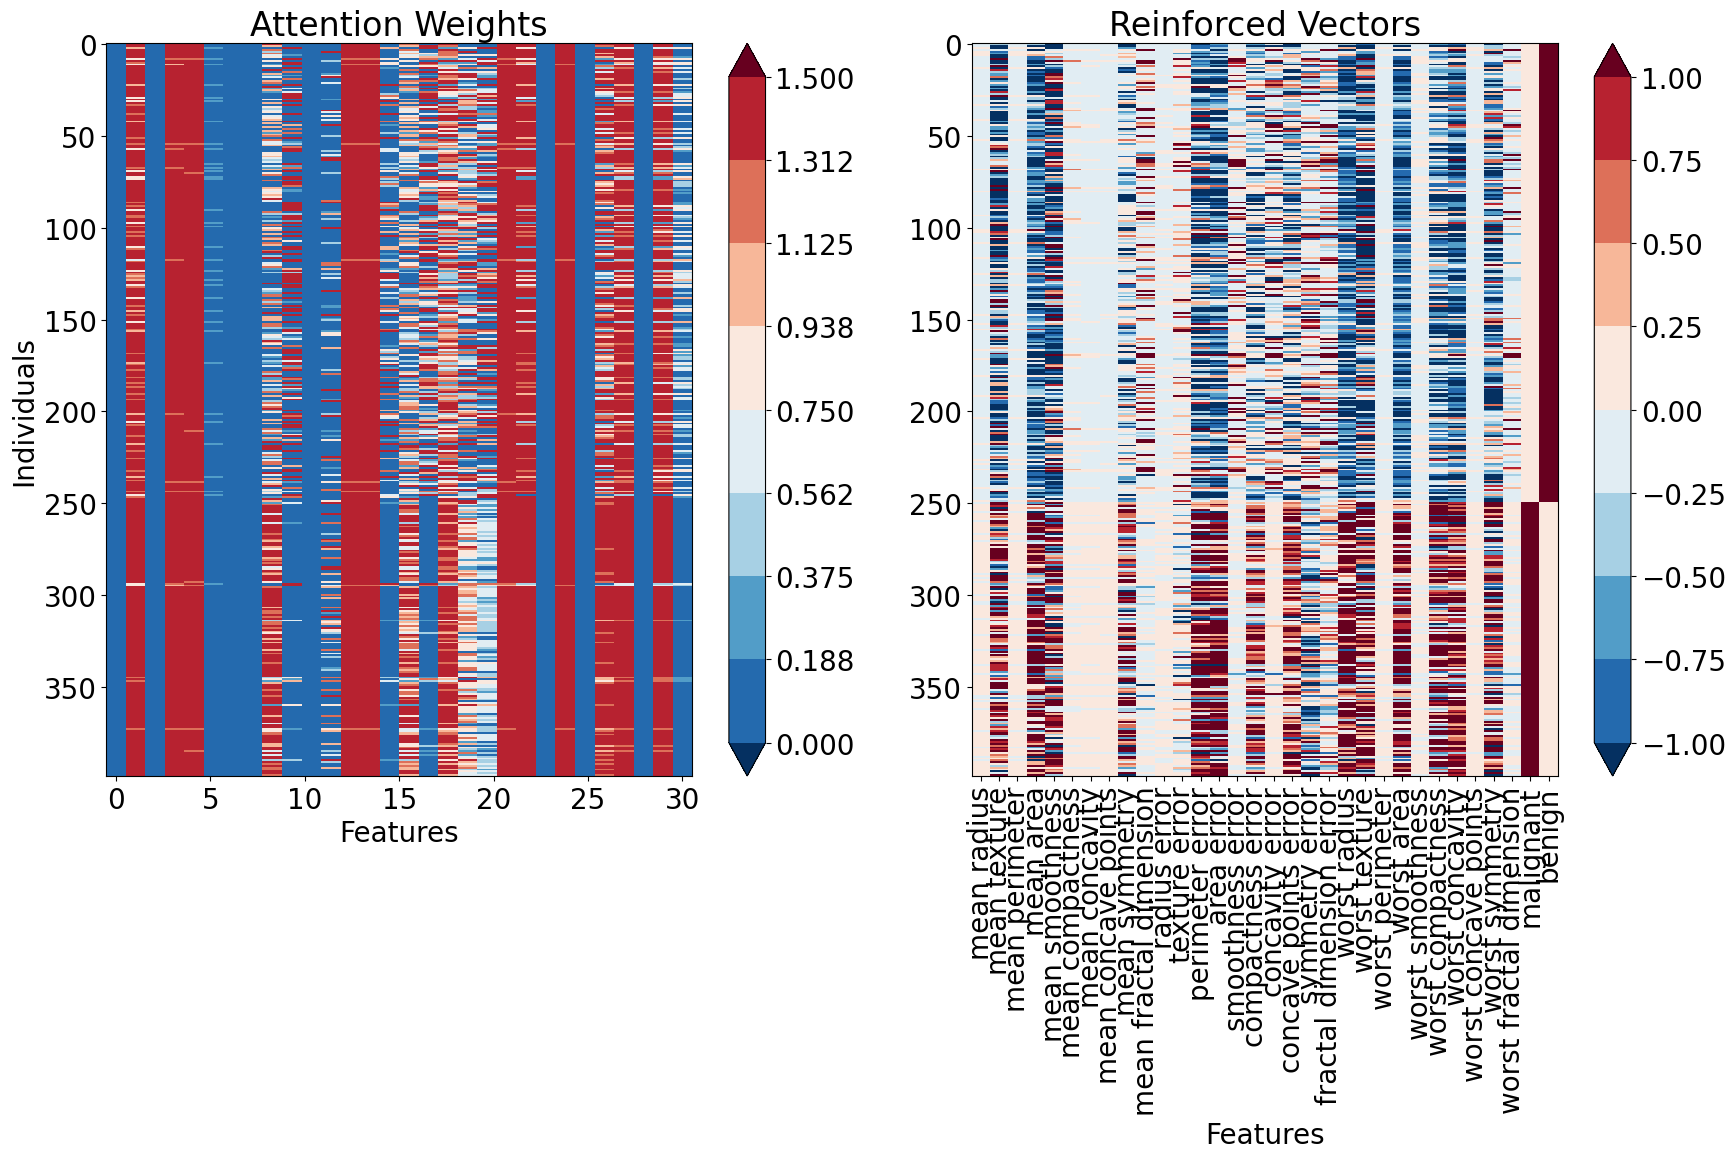

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.rcParams.update({'font.size': 20})
# Attention Weights
sorted_attention_wts = [x[0] for x in sorted(combined_list, key=lambda x: x[1].tolist(), reverse=True)]
attention_weights_sorted = np.array(sorted_attention_wts)
num_rows, num_cols = attention_weights_sorted.shape
att_weights = attention_weights_sorted.reshape(num_rows, num_cols)

# Reinforced Vectors
reinf_vector = np.array(reinf_vectors)
num_rows, num_cols = reinf_vector.shape
weights_reinforced = reinf_vector.reshape(num_rows, num_cols)

weights_reinforced = np.concatenate([weights_reinforced, y_train.astype(float)], axis=1)
weights_reinforced = weights_reinforced[weights_reinforced[:, -2].argsort()]

# Create a subplot  figsize=(25,25)
fig, axs = plt.subplots(1,2,figsize=(18,12))

# Plot 1: Attention Weights
axs[0].imshow(att_weights, cmap='coolwarm', aspect='auto', extent=[0, att_weights.shape[1], att_weights.shape[0], 0])
X_plot, Y_plot = np.meshgrid(np.linspace(0, att_weights.shape[1], att_weights.shape[1]), np.linspace(0, att_weights.shape[0], att_weights.shape[0]))
Z_plot = att_weights
bounds = np.linspace(0,1.5, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend="both")
pcm = axs[0].pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=axs[0])
axs[0].set_title(f'Attention Weights')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Individuals')
x_ticks = np.linspace(0,weights.shape[1],weights.shape[1])  # Adjusted
# x_tick_labels = list(feature_names)[:att_weights.shape[1]]  # Adjusted

x_tick_labels = list(feature_names)
# plt.xticks(x_ticks, x_tick_labels, rotation=90)
# axs[0].set_xticks(x_ticks)
# axs[0].set_xticklabels(x_tick_labels, rotation=90)

# Plot 2: Reinforced Vectors
axs[1].imshow(weights_reinforced, cmap='coolwarm', aspect='auto', extent=[0, weights_reinforced.shape[1], weights_reinforced.shape[0], 0])
X_plot, Y_plot = np.meshgrid(np.linspace(0, weights_reinforced.shape[1], weights_reinforced.shape[1]), np.linspace(0, weights_reinforced.shape[0], weights_reinforced.shape[0]))
Z_plot = weights_reinforced  # Corrected
# With out-of-bounds colors:
bounds = np.linspace(-1, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend="both")
pcm = axs[1].pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='RdBu_r')  # Corrected
# The colorbar inherits the "extend" argument from BoundaryNorm.
fig.colorbar(pcm, ax=axs[1])
axs[1].set_title(f'Reinforced Vectors')
axs[1].set_xlabel('Features')
# axs[1].set_ylabel('Individuals')
x_ticks = np.linspace(0, weights_reinforced.shape[1], weights_reinforced.shape[1])  # Adjusted
x_tick_labels = list(feature_names) + list(data.target_names)
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_tick_labels, rotation=90)

plt.tight_layout()
plt.show()



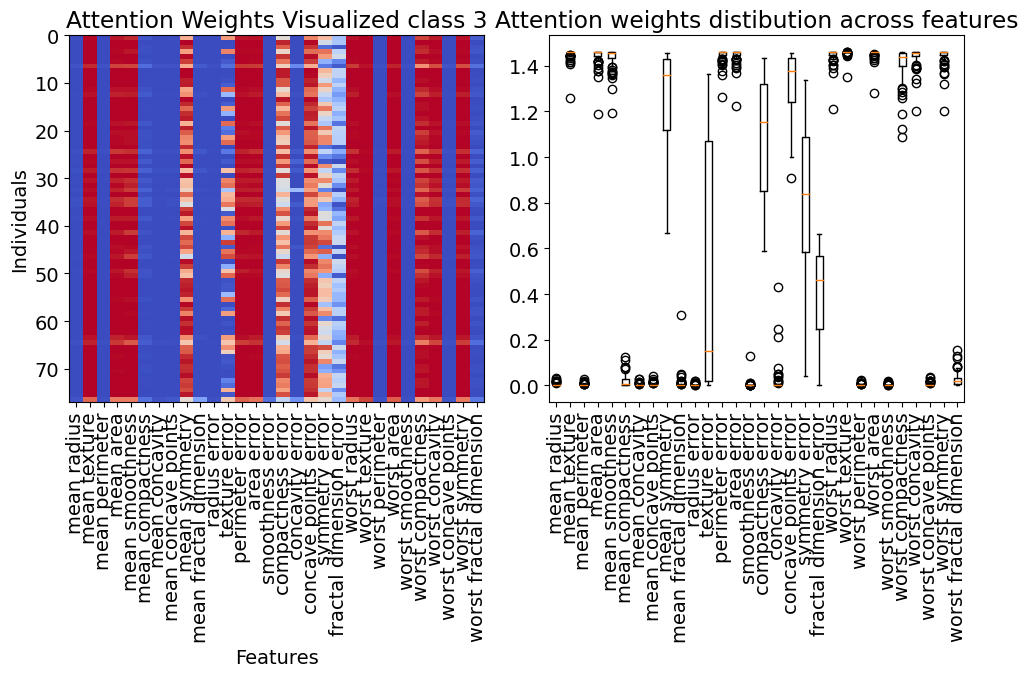

In [65]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
cls = 3
X_ = X_scaled[np.where(np.array(classification)==cls)[0],:]
attn_wts = []

for i, j in zip(X_, layer_model.model_([X_,X_]).numpy()):
    attn_wts.append(j/i)
attention_weights = np.array(attn_wts)
num_rows, num_cols = attention_weights.shape
weights = attention_weights.reshape(num_rows, num_cols)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Plot the first subplot
axs[0].imshow(weights, cmap='coolwarm', aspect='auto', extent=[0, weights.shape[1], weights.shape[0], 0])
axs[0].set_title('Attention Weights Visualized class {}'.format(cls))
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Individuals')
x_ticks = np.linspace(0.5, weights.shape[1]-0.5, weights.shape[1])
x_tick_labels = list(feature_names)
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_tick_labels, rotation=90)

# Plot the second subplot
axs[1].boxplot(weights)
axs[1].set_title("Attention weights distibution across features")
x_ticks = np.linspace(1, weights.shape[1], weights.shape[1])
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_tick_labels, rotation=90)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


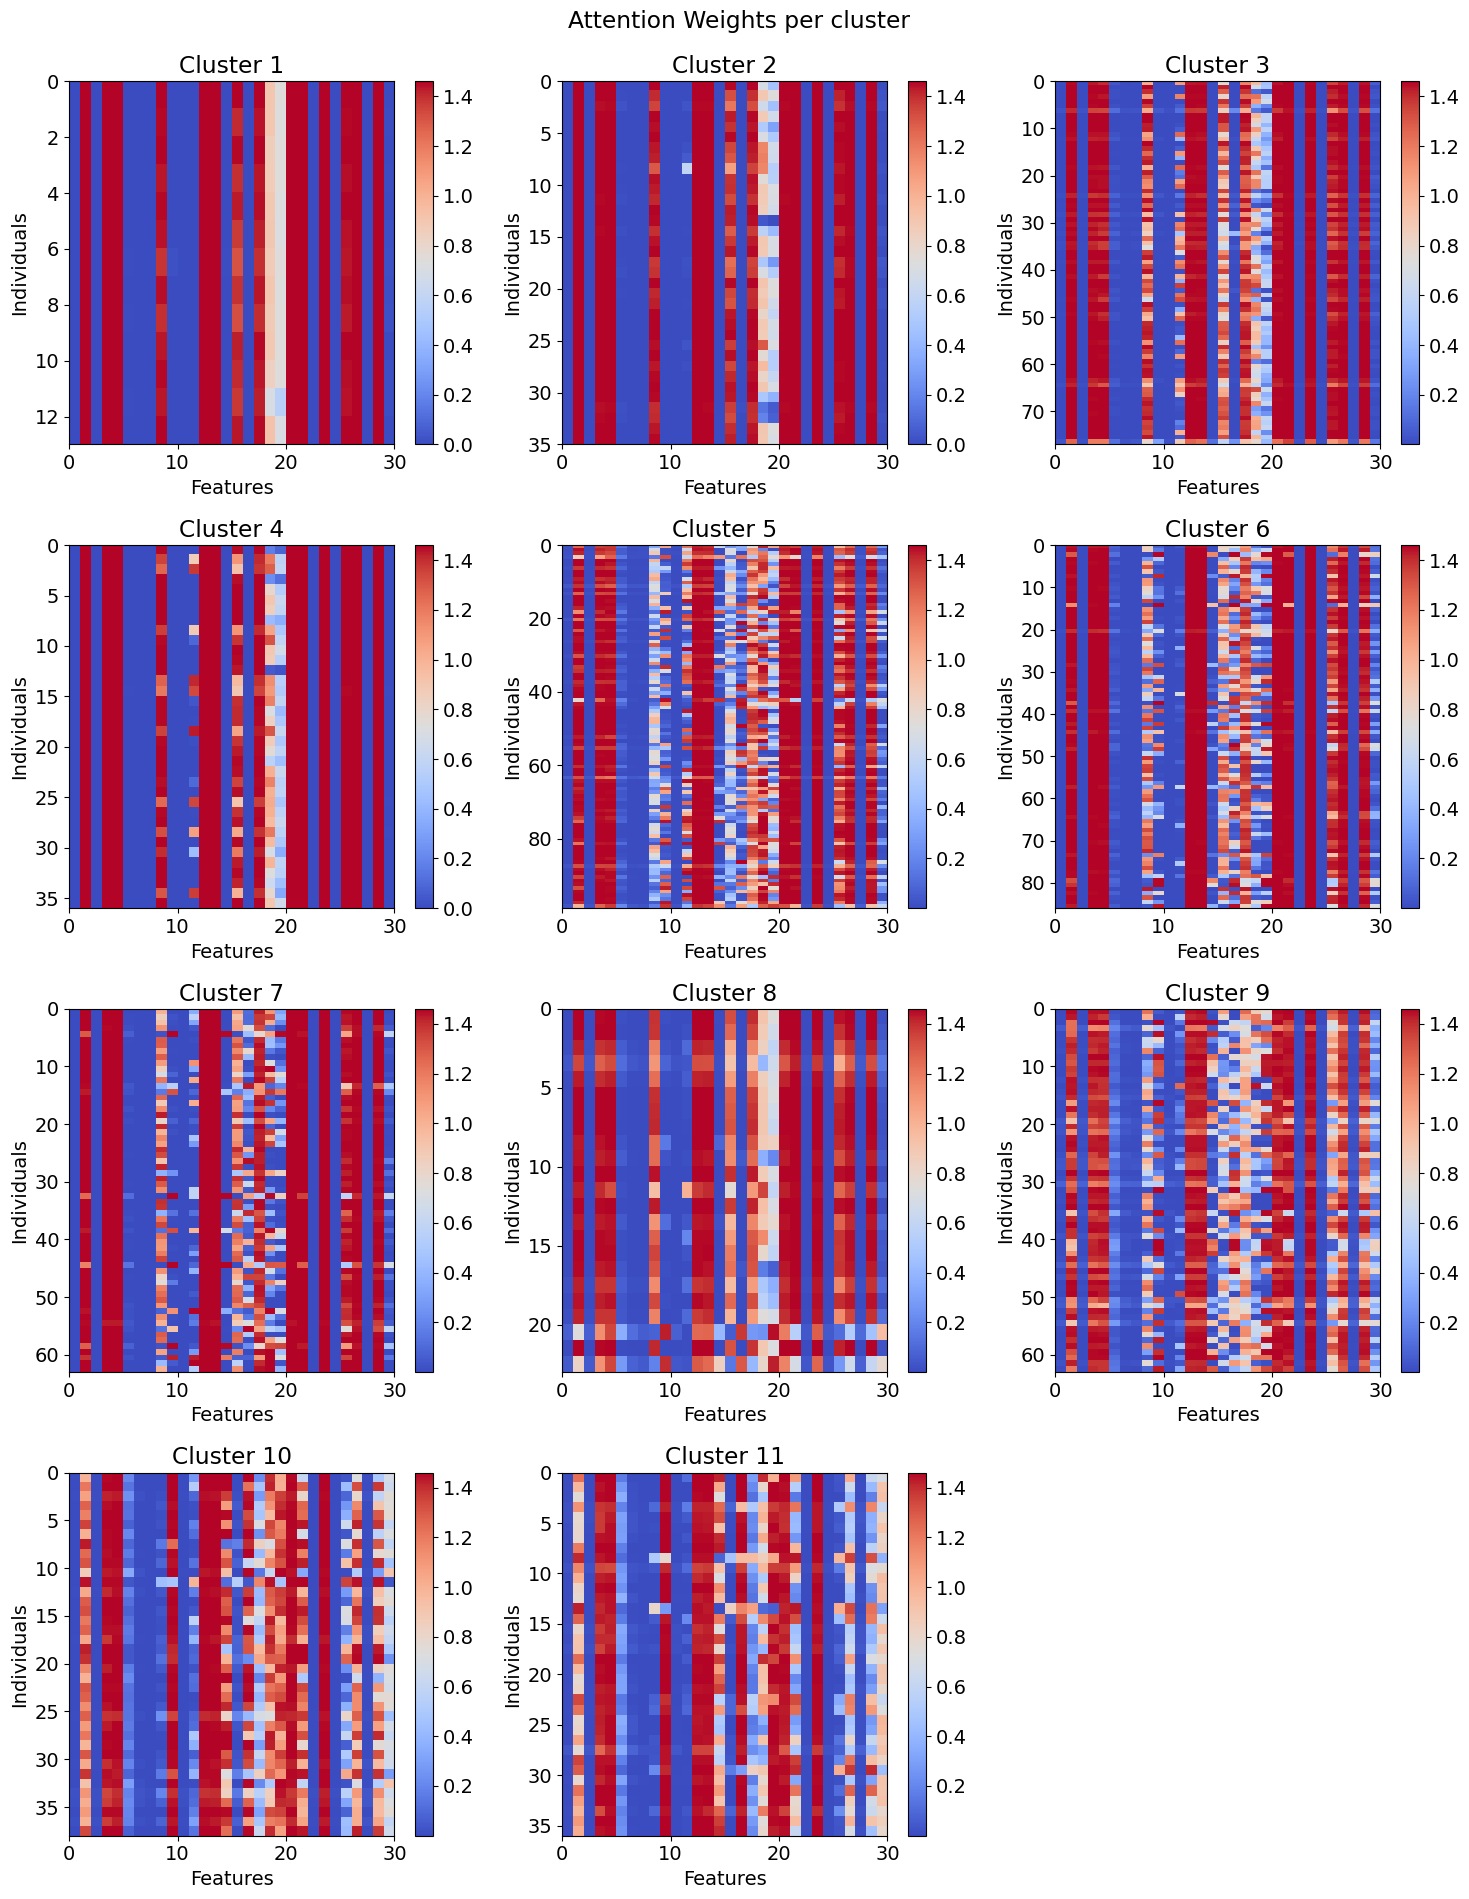

In [66]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(15, 20))  # 3 rows, 4 columns
plt.suptitle("Attention Weights per cluster")  # Overall title for the entire grid

for index, cls in enumerate(np.unique(classification)[:11]):  # Limit to 11 unique classes
    X_ = X_scaled[np.where(np.array(classification) == cls)[0], :]
    attn_wts = []
    for i, j in zip(X_, layer_model.model_([X_, X_]).numpy()):
        attn_wts.append(j / i)
    attention_weights = np.array(attn_wts)

    row = index // 3  # Calculate the row index in the 3x4 grid
    col = index % 3  # Calculate the column index in the 3x4 grid
    num_rows, num_cols = attention_weights.shape
    weights = attention_weights.reshape(num_rows, num_cols)
    if len(weights) > 0:
        ax = axes[row, col]  # Access the correct subplot in the grid
        im = ax.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0, weights.shape[1], weights.shape[0], 0])
        ax.set_title('Cluster {}'.format(cls))
        ax.set_xlabel('Features')
        ax.set_ylabel('Individuals')
        

        fig.colorbar(im, ax=ax)

# Remove empty subplots
for index in range(len(np.unique(classification)[:11]), 12):
    row = index // 3
    col = index % 3
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.99])  # Adjust layout and suptitle position
plt.savefig("brst-cluster", bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

